<a href="https://colab.research.google.com/github/iihsan23/ptsmp12025/blob/main/ihsan_Cat_vs_Wildfire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
import keras
import random
import shutil
from matplotlib.image import imread
from pathlib import Path
import shutil
import random
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout,BatchNormalization,Dropout
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import files
files.upload()

Saving model_quantized-ihsan.tflite to model_quantized-ihsan (1).tflite
Buffered data was truncated after reaching the output size limit.

In [ ]:
!mkdir ~/.kaggle
!cp kaggle-4.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle-4.json

cp: cannot stat 'kaggle-4.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle-4.json': No such file or directory


In [ ]:
!kaggle datasets download -d andrewmvd/animal-faces

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/animal-faces
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
 99% 691M/696M [00:06<00:00, 92.7MB/s]
100% 696M/696M [00:06<00:00, 107MB/s] 


In [ ]:
zip_ref = zipfile.ZipFile('/content/animal-faces.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

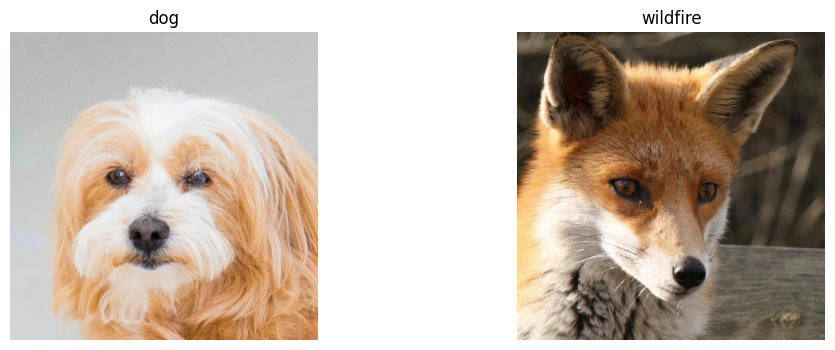

In [ ]:
dog = "/content/afhq/train/dog/flickr_dog_000002.jpg"
wildfire = "/content/afhq/train/wild/flickr_wild_000002.jpg"

plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.imshow(imread(dog))
plt.title("dog")
plt.axis("off")

plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(imread(wildfire))
plt.title("wildfire")

plt.show()

In [ ]:
def delete_cat_directory(base_path="afhq"):
    for split in ["train", "val"]:
        cat_dir = os.path.join(base_path, split, "cat")
        if os.path.exists(cat_dir):
            shutil.rmtree(cat_dir)
            print(f"Deleted: {cat_dir}")
        else:
            print(f"Not found: {cat_dir}")

delete_cat_directory()

Deleted: afhq/train/cat
Deleted: afhq/val/cat


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/afhq/train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    '/content/afhq/val',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

Found 9477 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
Model = Sequential()
Model.add(Conv2D(32,kernel_size=(3,3),padding = 'valid',activation = 'relu',input_shape = (128,128,3)))

Model.add(MaxPooling2D(pool_size=(2,2),strides=1,padding = 'valid'))
Model.add(Conv2D(128,kernel_size=(3,3),padding = 'valid',activation = 'relu'))
Model.add(MaxPooling2D(pool_size=(2,2),strides=1,padding = 'valid'))

Model.add(Conv2D(64,kernel_size=(3,3),padding = 'valid',activation = 'relu'))
Model.add(MaxPooling2D(pool_size=(2,2),strides=1,padding = 'valid'))

Model.add(Conv2D(32,kernel_size=(3,3),padding = 'valid',activation = 'relu'))
Model.add(MaxPooling2D(pool_size=(2,2),strides=1,padding = 'valid'))

Model.add(Conv2D(16,kernel_size=(3,3),padding = 'valid',activation = 'relu'))
Model.add(MaxPooling2D(pool_size=(2,2),strides=1,padding = 'valid'))

Model.add(Flatten())
Model.add(Dense(128,activation = 'relu'))

Model.add(Dense(1,activation = 'sigmoid'))
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
optimizer = Adam(learning_rate=0.0001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

In [ ]:
Model.compile(loss = 'binary_crossentropy',optimizer = optimizer,metrics = ['accuracy'])

In [ ]:
Model.fit(train_generator ,validation_data=test_generator ,epochs = 5, callbacks=[early_stop, reduce_lr])

Epoch 1/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 90s 252ms/step - accuracy: 0.7157 - loss: 0.5381 - val_accuracy: 0.7540 - val_loss: 0.5906 - learning_rate: 1.0000e-04
Epoch 2/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 65s 218ms/step - accuracy: 0.8626 - loss: 0.3124 - val_accuracy: 0.8460 - val_loss: 0.3317 - learning_rate: 1.0000e-04
Epoch 3/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 65s 218ms/step - accuracy: 0.8868 - loss: 0.2682 - val_accuracy: 0.9010 - val_loss: 0.2144 - learning_rate: 1.0000e-04
Epoch 4/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 67s 225ms/step - accuracy: 0.9014 - loss: 0.2383 - val_accuracy: 0.9270 - val_loss: 0.1834 - learning_rate: 1.0000e-04
Epoch 5/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 65s 220ms/step - accuracy: 0.9014 - loss: 0.2420 - val_accuracy: 0.9530 - val_loss: 0.1262 - learning_rate: 1.0000e-04


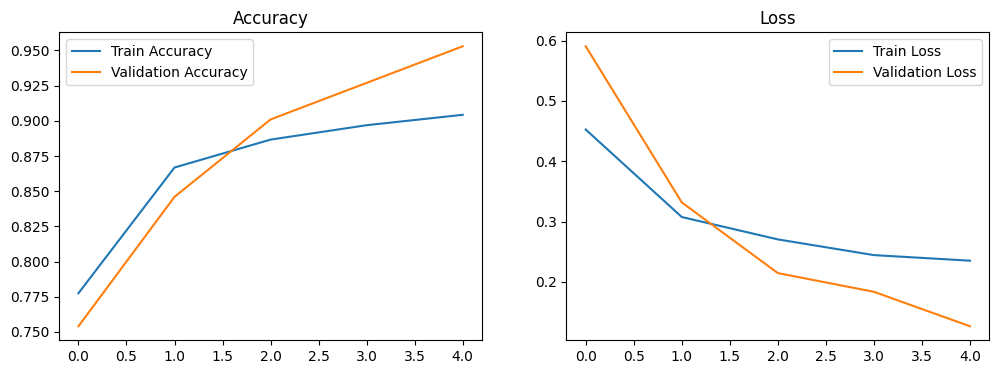

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(Model.history.history['accuracy'], label='Train Accuracy')
plt.plot(Model.history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(Model.history.history['loss'], label='Train Loss')
plt.plot(Model.history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [ ]:
import tensorflow as tf
import os
converter = tf.lite.TFLiteConverter.from_keras_model(Model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

model_path = 'model_quantized-ihsan.tflite'
with open(model_path, 'wb') as f:
    f.write(tflite_model)

size_in_bytes = os.path.getsize(model_path)
size_in_mb = size_in_bytes / 1024 / 1024

print(f"Quantized Model Size: {size_in_mb:.2f} MB")

Saved artifact at '/tmp/tmpyjj_vhk0'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  134244995405136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134244995405904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134244995407632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134244995399952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134244995409744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134244995410512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134244995410320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134244995410704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134244995410896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134244995412048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13424499540916

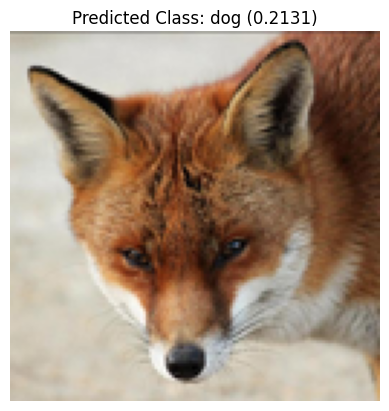

In [ ]:
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

interpreter = tf.lite.Interpreter(model_path="/content/model_quantized-ihsan.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

image_path = '/content/afhq/val/wild/flickr_wild_000004.jpg'
img = Image.open(image_path)

input_shape = input_details[0]['shape']
target_height, target_width = input_shape[1], input_shape[2]
expected_channels = input_shape[3]

img = img.resize((target_width, target_height))

img_array = np.array(img).astype(np.float32) / 255.0

if expected_channels == 1:
    img_array = np.mean(img_array, axis=-1, keepdims=True)

img_array = np.expand_dims(img_array, axis=0)

interpreter.set_tensor(input_details[0]['index'], img_array)
interpreter.invoke()

predictions = interpreter.get_tensor(output_details[0]['index'])

probability = predictions[0][0]

class_labels = ['dog', 'wildfire']

predicted_class = 1 if probability >= 0.5 else 0
predicted_label = class_labels[predicted_class]
plt.title(f"Predicted Class: {predicted_label} ({probability:.4f})")
plt.imshow(img)
plt.axis('off')
plt.show()